In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 2

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pylab as plt
import pandas as pd

In [6]:
from model import get_model, get_train_test_pools, get_precision_recall, load_model, get_model_path

In [1]:
%%time
N=5
DIRECTION='is_turnpt'
WEIGHTS_QUNATILE = 0.01

model = get_model(N, DIRECTION, WEIGHTS_QUNATILE, DEPTH=10, LEARNING_RATE=1, L2_LEAF_REG=10*5, OD_WAIT=50, CACHE=True, ADD_DIFF=False)
# path = get_model_path(N, DIRECTION)
# model = load_model(path)

In [9]:
%%time
train_pool, test_pool =  get_train_test_pools(N,DIRECTION, WEIGHTS_QUNATILE, CACHE=True)
# best_iter = next(map(lambda x: len(x[1])-1, model.eval_metrics(train_pool,['Precision']).items()))
# model.plot_tree(best_iter)

transformed OHLCV at frequency 1D
reading cache of TXF in 1D OHLCV
CPU times: user 3.86 s, sys: 31.3 ms, total: 3.89 s
Wall time: 3.86 s


In [10]:
print('training pool')
get_precision_recall(model, train_pool)

print('testing pool')
get_precision_recall(model, test_pool)

training pool


,class_,Precision,Recall
0,-1.0,100.00 %,100.00 %
1,0.0,100.00 %,100.00 %
2,1.0,100.00 %,100.00 %


testing pool


,class_,Precision,Recall
0,-1.0,34.65 %,47.93 %
1,0.0,10.96 %,0.97 %
2,1.0,41.66 %,36.29 %


,y,pred,occurence
0,-1.0,-1.0,57
1,-1.0,1.0,59
2,0.0,-1.0,843
3,0.0,0.0,16
4,0.0,1.0,786
5,1.0,-1.0,60
6,1.0,0.0,1
7,1.0,1.0,50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09fd7e6f10>,
      dtype=object)

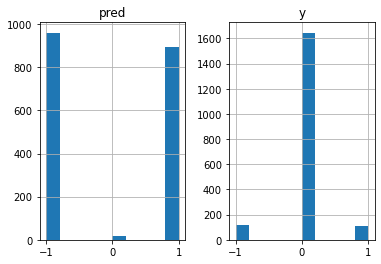

In [11]:
df_pred = (
    pd.DataFrame(model.predict(test_pool), columns=['pred']).
    assign(y=test_pool.get_label())
)

df_pred_summary = df_pred.groupby(['y', 'pred']).size().to_frame('occurence').reset_index()
df_pred_summary


df_pred[['pred', 'y']].hist()

# plot entry and exit

In [9]:
# def plot_turnpt(price, turnpts, dates_index):
#     index_upward = np.where(turnpts==1)[0]
#     index_downward = np.where(turnpts==-1)[0]
    
#     plt.figure(figsize=(20, 5))
#     plt.plot(dates_index, price, color='black', markevery=index_upward.tolist(), marker='^', markerfacecolor='red', markeredgewidth=0.0)
#     plt.plot(dates_index, price, color='black', markevery=index_downward.tolist(), marker='v', markerfacecolor='green', markeredgewidth=0.0)


# test_df_y = df_y[df_y.index.isin(y_test.index)]
# test_price = test_df_y.close.values
# test_turnpts_true = test_df_y.is_turnpt.values
# test_dates_index = test_df_y.index
# plot_turnpt(test_price, test_turnpts_true, test_dates_index)

In [ ]:
# def get_predict_class(model, pool, threshold = 0):
#     max_prob = model.predict_proba(pool).max(axis=1)
#     turnpts_pred = model.predict(pool).flatten()
#     turnpts_pred_filtered = np.where(max_prob>=threshold, turnpts_pred, 0)
#     return turnpts_pred_filtered

# test_turnpts_pred = get_predict_class(model, test_pool)
# plot_turnpt(test_price, test_turnpts_pred, test_dates_index)

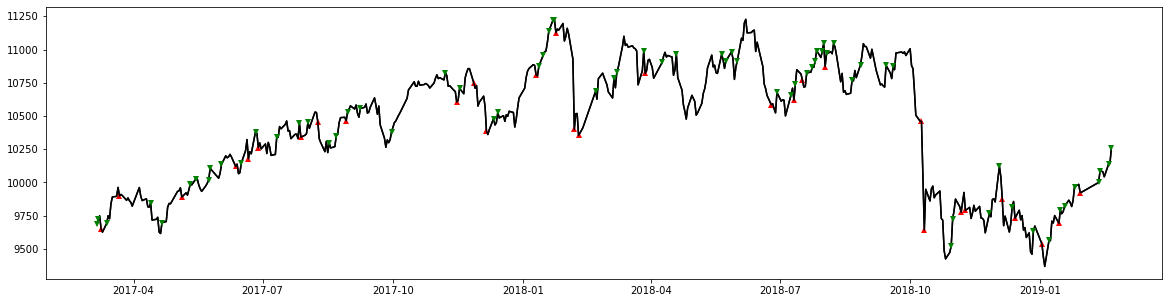

In [228]:
# # only plot 1 or -1 when prob > thereshold
# # noises during 2018-M7 disappear
# test_turnpts_pred = get_predict_class(model, test_pool, threshold=0.6)
# plot_turnpt(test_price, test_turnpts_pred, test_dates_index)

# plot NAV

In [231]:
# test_df_y['is_turnpt_pred'] = get_predict_class(model, test_pool)
# test_df_y.head()

<ipython-input-231-74b3a4708c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_y['is_turnpt_pred'] =get_predict_class(model, test_pool)


,tx_datetime,N,open,high,low,close,vol,maturity,day_to_maturity,is_turnpt_upward,is_turnpt_downward,is_turnpt,next_dt_turnpt,prc_diff,duration,slope,is_turnpt_pred
tx_datetime,,,,,,,,,,,,,,,,,
2017-03-06,2017-03-06,1,9639.0,9684.0,9619.0,9683.0,196244.0,2017-03-15,-9,0.0,0.0,0.0,2017-03-07,44.0,1,44.000000,-1.0
2017-03-07,2017-03-07,1,9693.0,9734.0,9682.0,9727.0,188700.0,2017-03-15,-8,0.0,0.0,0.0,2017-03-08,21.0,1,21.000000,-1.0
2017-03-08,2017-03-08,1,9736.0,9765.0,9701.0,9748.0,226610.0,2017-03-15,-7,0.0,1.0,-1.0,2017-03-09,-96.0,1,-96.000000,0.0
2017-03-09,2017-03-09,1,9739.0,9742.0,9642.0,9652.0,277266.0,2017-03-15,-6,0.0,0.0,0.0,2017-03-10,-27.0,1,-27.000000,1.0
2017-03-10,2017-03-10,1,9647.0,9652.0,9555.0,9625.0,307656.0,2017-03-15,-5,1.0,0.0,1.0,2017-03-13,67.0,3,22.333333,1.0


In [350]:
# # test_df_y
# (
#     test_df_y.query('is_turnpt_pred != 0').loc[:, ['tx_datetime', 'close']].
#     assign(entry = lambda x: x.tx_datetime, 
#            exit = lambda x: x.tx_datetime.shift(-1)).dropna().
#     assign(p_entry = lambda x: x.close.loc[x.entry],# 
# #            p_exit = lambda x: x.close[x.exit],# 
# #            ret = lambda x: x.p_exit.div(x.p_entry)-1
#     )
# #     loc[:, ['entry', 'exit']].
# #     join(test_df_y, how='right')
# )

# check X

# show metrics